<a href="https://colab.research.google.com/github/CKrishnaGhrini/Project-TipPrediction/blob/main/Project_TipPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tip=pd.read_csv('/content/tips.csv')


In [ ]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tip.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


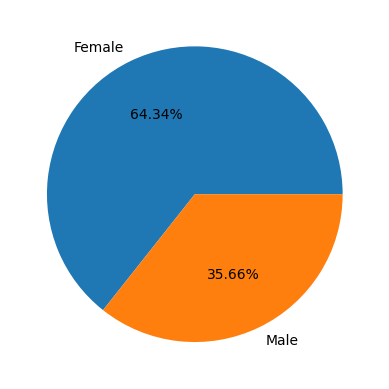

In [ ]:
plt.pie(tip['sex'].value_counts(),labels=tip['sex'].unique(),autopct='%1.2f%%')
plt.show()

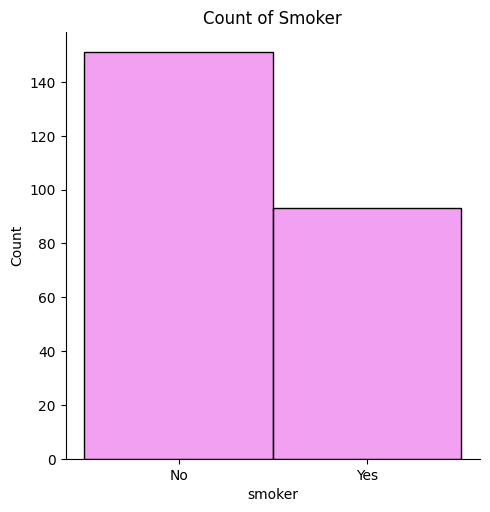

In [ ]:
sns.displot(tip['smoker'],color='violet')
plt.title("Count of Smoker")
plt.show()

In [ ]:
temp=tip.groupby(['sex','smoker']).count().reset_index()

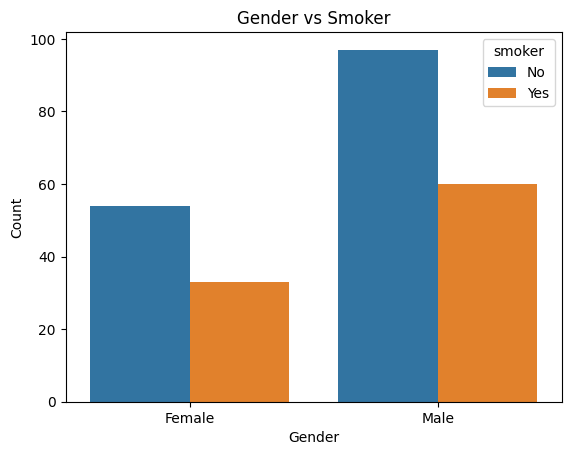

In [ ]:
sns.barplot(x=temp['sex'],y=temp['tip'],hue=temp['smoker'])
plt.title("Gender vs Smoker")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [ ]:
tip.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
male=[]
female=[]
for index,row in tip.iterrows():
  if(row['sex']=="Male"):
    male.append(row['tip'])
  else:
    female.append(row['tip'])


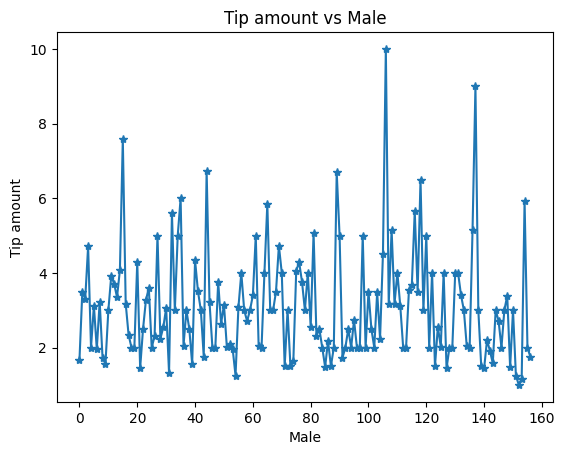

In [ ]:
plt.plot(male,marker='*')
plt.xlabel("Male")
plt.ylabel("Tip amount")
plt.title("Tip amount vs Male")
plt.show()

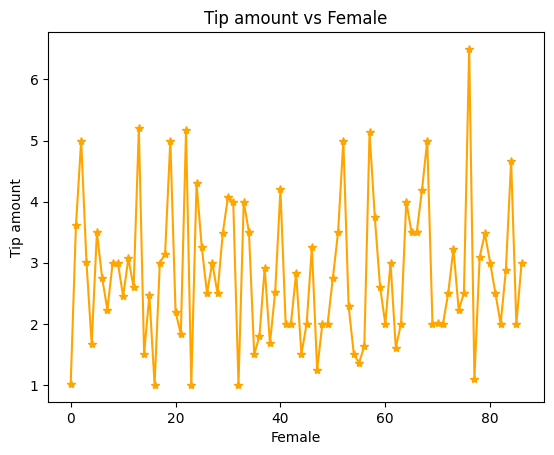

In [ ]:
plt.plot(female,marker='*',color='orange')
plt.xlabel("Female")
plt.ylabel("Tip amount")
plt.title("Tip amount vs Female")
plt.show()

In [ ]:
tip['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

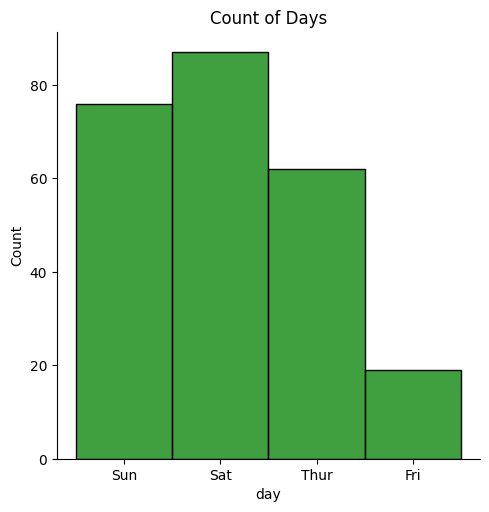

In [ ]:
sns.displot(tip['day'],color='green')
plt.title("Count of Days")
plt.show()

In [ ]:
temp=tip.groupby(['day','sex']).count().reset_index()

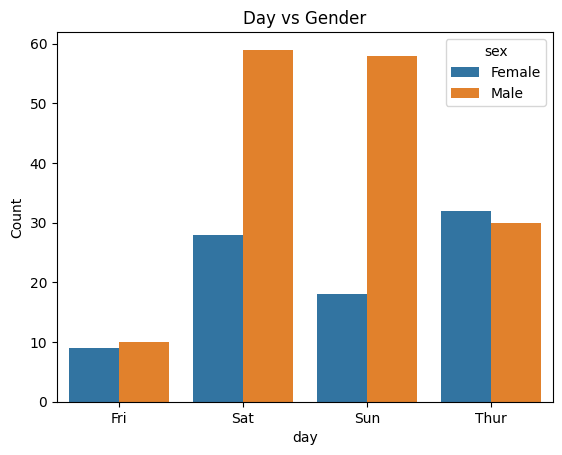

In [ ]:
sns.barplot(x=temp['day'],y=temp['tip'],hue=temp['sex'])
plt.ylabel("Count")
# plt.xlabel("Day")
plt.title("Day vs Gender")
plt.show()

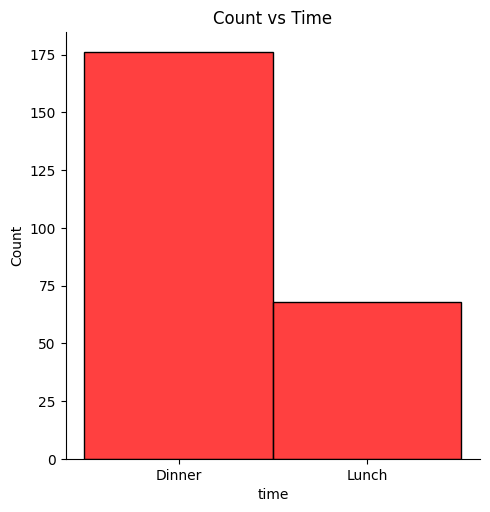

In [ ]:
sns.displot(tip['time'],color='red')
plt.title("Count vs Time")
plt.show()

In [ ]:
temp=tip.groupby(['time'])['tip'].mean().reset_index()

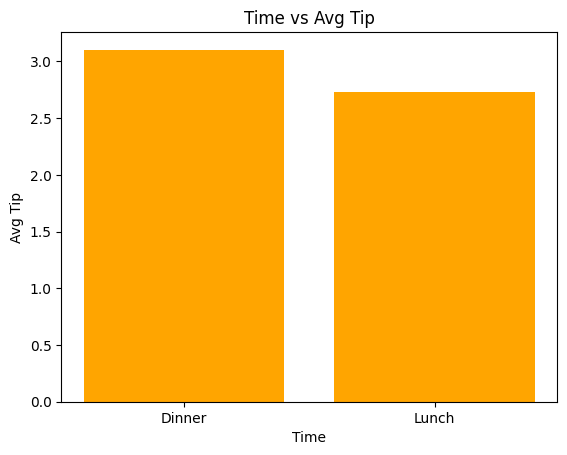

In [ ]:
plt.bar(temp['time'],temp['tip'],color='orange')
plt.xlabel("Time")
plt.ylabel("Avg Tip")
plt.title("Time vs Avg Tip")
plt.show()

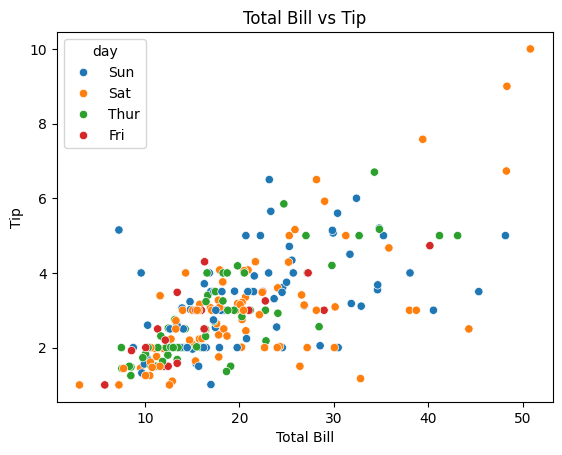

In [ ]:
sns.scatterplot(x=tip['total_bill'],y=tip['tip'],hue=tip['day'])
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs Tip")
plt.show()

In [ ]:
tip.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

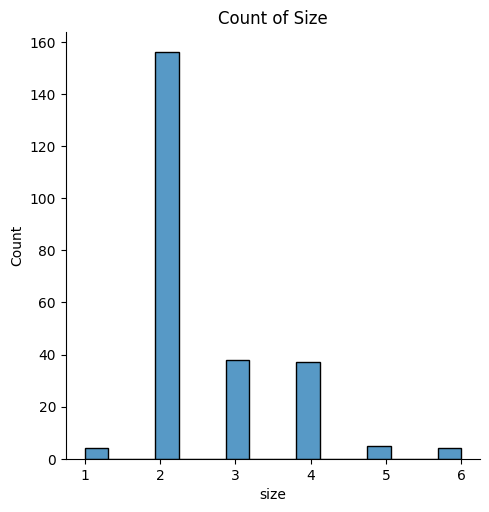

In [ ]:
sns.displot(tip['size'])
plt.title("Count of Size")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
tip['sex']=le.fit_transform(tip['sex'])
tip['smoker']=le.fit_transform(tip['smoker'])
tip['day']=le.fit_transform(tip['day'])
tip['time']=le.fit_transform(tip['time'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [ ]:
X=tip.drop('tip',axis=1)
y=tip['tip']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(f"the length of training data is {len(X_train)}")
print(f"the length of testing data is {len(X_test)}")

the length of training data is 195
the length of testing data is 49


In [ ]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=rf.predict(X_test)


In [ ]:
print(f"the r2 score is {r2_score(y_test,y_pred)}")

the r2 score is 0.22817538359563128


In [ ]:
mse=mean_squared_error(y_test,y_pred)

In [ ]:
mse

0.964758654081634

In [ ]:
np.sqrt(mse)

0.9822212856997317

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred=lr.predict(X_test)

In [ ]:
print(f"the r2 score is {r2_score(y_test,pred)}")

the r2 score is 0.4441368826121932


In [ ]:
mse_lr=mean_squared_error(y_test,pred)

In [ ]:
np.sqrt(mse_lr)

0.8335544185167343

In [ ]:
rf_acc=r2_score(y_test,y_pred)
lr_acc=r2_score(y_test,pred)

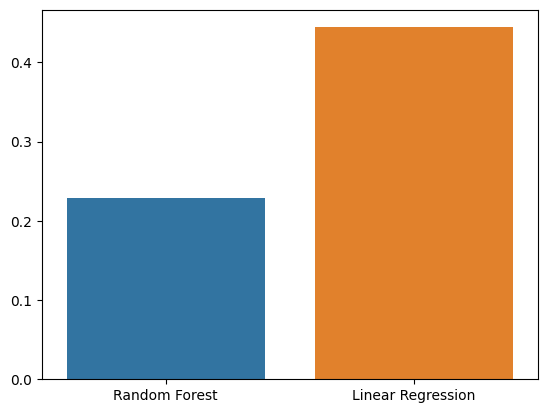

In [ ]:
sns.barplot(x=['Random Forest','Linear Regression'],y=[rf_acc,lr_acc],hue=['Random Forest','Linear Regression'])
plt.show()

In this project the model predicts the tip amount given by a family using Linear Regression and Random Forest. The r2_score of the model when trained with linear regression is 0.44 and with random forest it is 0.22. Since r2 score of linear regression is higher than the other. We will use linear regression here.